In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import common_functions as cf
import keras_tuner as kt

# from keras import models
# from keras import layers

In [2]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


# CNN

In [3]:
def MakeModel(class_names: list) -> tf.keras.Sequential:
    """
    Simple straight forward CNN model. this is just for simplicity and testing
    atm. I will make it more modular later once I know what we are doing

    Args:
        class_names: list of the classification names
        conv_layers: list of how many filters each convolutional layer should use
        layers: list with the sizes of each hidden layer
    
    Returns:
        `tf.keras.Sequential` - a constructed tf model
    """
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255))
    model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(rate=0.1))
    model.add(tf.keras.layers.Dense(len(class_names))) # output

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    return model
    

## Load Data

In [4]:
if not os.path.exists("../Data/Augmented"):
    cf.AugmentImages()

300 / 320 | ../Data/Augmented/Validation/2kf/ (38 / 39)
Augmented images finished!
{'original': 20799, 'augmented': 20799, 'running_total': 291182}


Found 24958 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.


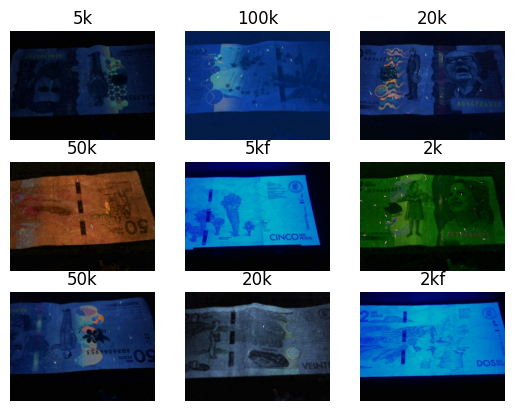

In [5]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(path = "../Data/Augmented/", batch_size=16)
cf.PeakData(train_ds, class_names)

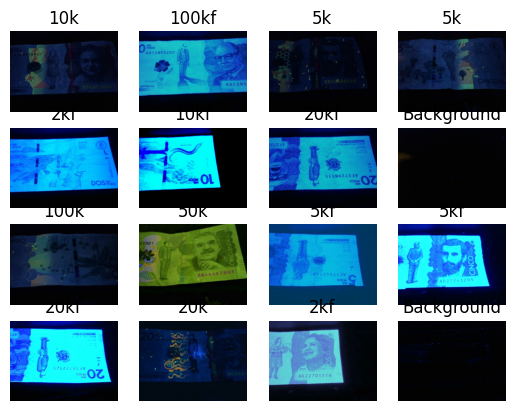

In [6]:
cf.PeakData(train_ds, class_names, 4, 4)

# Fit

In [7]:
model = MakeModel(class_names)
model.fit(
    train_ds,
    validation_data=validation_ds
)

1154/1560 [=====================>........] - ETA: 3:05 - loss: 3.0590 - accuracy: 0.0763

KeyboardInterrupt: 

# Evaluate

In [ ]:
eval_result = hypermodel.evaluate(test_ds)
print("[test loss, test accuracy]:", eval_result)

NameError: name 'hypermodel' is not defined

# Results

grayscale, no augmentation, hyperparameterized (no regularization) = 0.998 searched, 0.995 trained, 0.9957 test

grayscale, no augmentation, hyperparameterized (regularization) = --- searched, 0.9885 trained, 0.9567 validation, 0.9596 test

